In [1]:
# Import all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
# Load the data

df = pd.read_csv('/content/DOC-20251031-WA0019_', encoding='latin1')
df.head()

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


### Data Inspection

In [6]:
df.shape

(465, 16)

In [7]:
df.describe()

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.00000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,17.049462,2048.698925,7511.455914,1150.313978,2170.247312,380.952688,78.554839,201.049462,894.260215,783.56129,847.470968,195.905376,58.083871,0.288712,0.329032
std,2.765186,354.391805,1294.065992,289.635071,424.190773,96.483460,49.363030,143.622664,486.193456,327.43195,489.224289,181.845543,48.027509,0.021208,0.474928
min,11.000000,1331.000000,4981.000000,601.000000,1660.000000,177.000000,3.000000,9.000000,0.000000,239.00000,0.000000,7.000000,0.000000,0.246000,0.000000
25%,15.000000,1802.000000,6523.000000,936.000000,1838.000000,312.000000,41.000000,79.000000,640.000000,535.00000,436.000000,63.000000,22.000000,0.273000,0.000000
50%,17.000000,1993.000000,7241.000000,1104.000000,2076.000000,366.000000,67.000000,178.000000,968.000000,736.00000,825.000000,137.000000,52.000000,0.287000,0.000000
75%,19.000000,2247.000000,8180.000000,1296.000000,2375.000000,436.000000,107.000000,292.000000,1206.000000,955.00000,1226.000000,285.000000,84.000000,0.300000,1.000000
max,26.000000,3308.000000,12364.000000,2295.000000,4189.000000,792.000000,309.000000,755.000000,2297.000000,2190.00000,2597.000000,1406.000000,335.000000,0.366000,2.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  465 non-null    object 
 1   YRS     465 non-null    int64  
 2   G       465 non-null    int64  
 3   AB      465 non-null    int64  
 4   R       465 non-null    int64  
 5   H       465 non-null    int64  
 6   2B      465 non-null    int64  
 7   3B      465 non-null    int64  
 8   HR      465 non-null    int64  
 9   RBI     465 non-null    int64  
 10  BB      465 non-null    int64  
 11  SO      465 non-null    int64  
 12  SB      465 non-null    int64  
 13  CS      465 non-null    int64  
 14  BA      465 non-null    float64
 15  HOF     465 non-null    int64  
dtypes: float64(1), int64(14), object(1)
memory usage: 58.3+ KB


<Axes: >

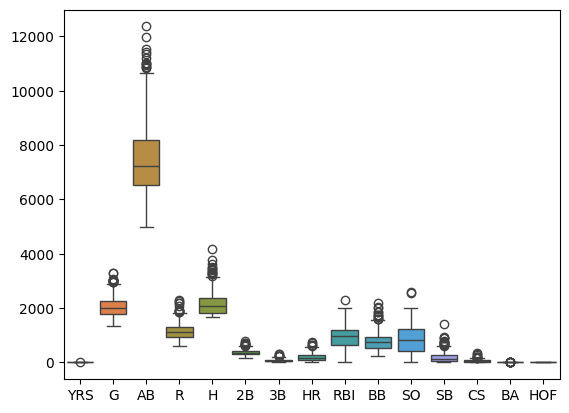

In [9]:
# Checking out outliers

sns.boxplot(df)

In [12]:
# Dropping unnecessary column

df.drop(columns = 'PLAYER', inplace=True)

In [13]:
df.head()

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


In [14]:
# Getting your x and y variable

x = df.drop(columns='HOF')
y = df['HOF']

In [16]:
# Checking the x and y

print(x.head())

   YRS     G     AB     R     H   2B   3B   HR   RBI    BB    SO   SB   CS  \
0   24  3035  11434  2246  4189  724  295  117   726  1249   357  892  178   
1   22  3026  10972  1949  3630  725  177  475  1951  1599   696   78   31   
2   22  2789  10195  1882  3514  792  222  117   724  1381   220  432  129   
3   20  2747  11195  1923  3465  544   66  260  1311  1082  1840  358   97   
4   21  2792  10430  1736  3430  640  252  101     0   963   327  722   15   

      BA  
0  0.366  
1  0.331  
2  0.345  
3  0.310  
4  0.329  


In [17]:
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: HOF, dtype: int64


In [18]:
# Split your data into training and testing

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(372, 14)
(93, 14)
(372,)
(93,)


In [20]:
# Fit your data into scaler, putting it into an object

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
# Fit the x train and x test into scaler

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
# Print the result

print(x_train_scaled)
print(x_test_scaled)

[[0.46666667 0.35255438 0.31382907 ... 0.00929235 0.11343284 0.225     ]
 [0.13333333 0.25543753 0.24989842 ... 0.17155111 0.32238806 0.38333333]
 [0.2        0.23672231 0.18854124 ... 0.02144389 0.15223881 0.375     ]
 ...
 [0.46666667 0.32169954 0.32263308 ... 0.18656183 0.27462687 0.64166667]
 [0.53333333 0.58523015 0.50684004 ... 0.22444603 0.32537313 0.175     ]
 [0.2        0.21041983 0.16402546 ... 0.02144389 0.07761194 0.3       ]]
[[0.46666667 0.27971674 0.14181227 ... 0.01572552 0.10447761 0.29166667]
 [0.46666667 0.36267071 0.29093864 ... 0.03716941 0.14029851 0.26666667]
 [0.26666667 0.36621143 0.44507653 ... 0.26304503 0.37910448 0.78333333]
 ...
 [0.4        0.2635306  0.17757009 ... 0.02215868 0.03880597 0.325     ]
 [0.33333333 0.38340921 0.43938778 ... 0.03645461 0.10149254 0.43333333]
 [0.53333333 0.54577643 0.55871597 ... 0.14152966 0.14626866 0.59166667]]


In [25]:
# Start using the knn, firstly, import your KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

# Store it in a variable
knn = KNeighborsClassifier(n_neighbors=5)

In [26]:
# Fit the knn model

knn.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [27]:
# Make Prediction

y_pred = knn.predict(x_test_scaled)
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1]


In [32]:
# Evaluate by checking the model score

from sklearn.metrics import accuracy_score
print({'Accuracy':accuracy_score(y_test,y_pred)})
print({'Score':knn.score(x_test_scaled,y_test)})

{'Accuracy': 0.9247311827956989}
{'Score': 0.9247311827956989}


In [33]:
#Converting to a dataframe for prediction

yes = pd.DataFrame(x_test_scaled)
yes.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.466667,0.279717,0.141812,0.021898,0.012653,0.239024,0.137255,0.025469,0.319547,0.354690,0.143079,0.015726,0.104478,0.291667
1,0.466667,0.362671,0.290939,0.176399,0.126532,0.269919,0.078431,0.345845,0.483674,0.168119,0.523244,0.037169,0.140299,0.266667
2,0.266667,0.366211,0.445077,0.385036,0.455516,0.403252,0.526144,0.124665,0.389203,0.119426,0.168905,0.263045,0.379104,0.783333
3,0.333333,0.329287,0.322091,0.214720,0.173982,0.102439,0.333333,0.010724,0.037440,0.228601,0.101756,0.348821,0.232836,0.325000
4,0.200000,0.388467,0.406610,0.288321,0.242388,0.474797,0.052288,0.467828,0.593383,0.213224,0.508264,0.084346,0.140299,0.325000


In [40]:
# Predicting the result based on row

knn.predict(yes.iloc[[3]])

array([0])

In [41]:
# Evaluating using confution metrics

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[65  2]
 [ 5 21]]


In [42]:
# Using classification report for evaluation

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        67
           1       0.91      0.81      0.86        26

    accuracy                           0.92        93
   macro avg       0.92      0.89      0.90        93
weighted avg       0.92      0.92      0.92        93

